### Kernel Trick

Allows for a computationally efficient method of measuring "infinite dimensional" similarity between points and allows SVM's to work well on non-linearly seperable data via feature mapping.

Out of scope for this course, so just know that the kernel you will use is the Gaussian Kernel, also called the Radial Basis Function Kernel and that it is an expression of similarity and produces output in the range [0,1].

It has another hyperparamter $\gamma$ which is a coefficient for the result of the kernel.

If $\gamma$ is small then we have "simpler" boundaries and may underfit the data.

If $\gamma$ is large then we have "irregular" boundaries and may overfit the data.

In [19]:
# Imports and helper functions 
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

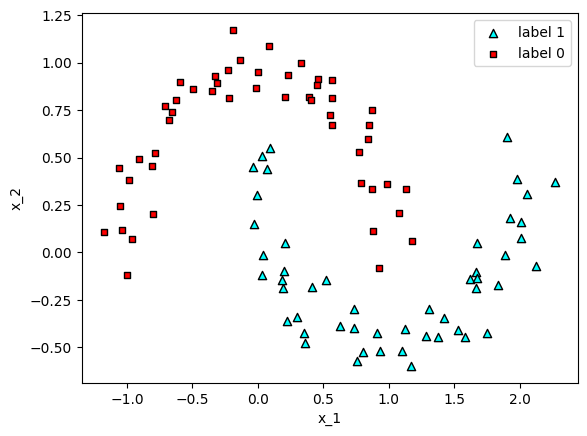

In [20]:
# Generate a dataset with 100 samples, noise level of 0.1, and a random state for reproducibility
X, y = make_moons(n_samples=100, noise=0.1, random_state=42)

# Plot the dataset
plot_points(X,y)

In [21]:
# Create arrays of possible hyperparameter values and print them
C_values = np.logspace(start = -3, stop = 3, base = 10, num = 7)
gamma_values = np.logspace(start = -3, stop = 3, base = 10, num = 7)

print(C_values)
print(gamma_values)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


C: 1.0 , Gamma: 0.001


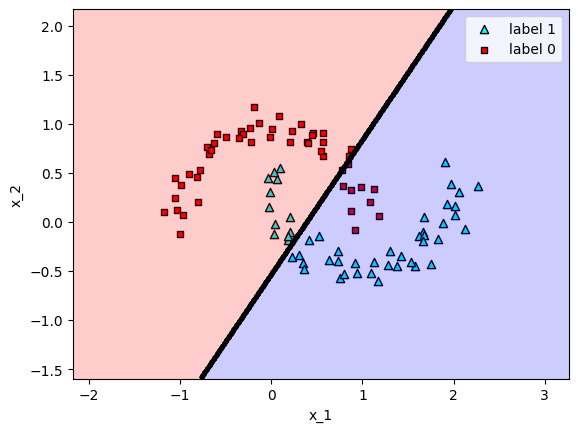

Accuracy: 0.79


In [22]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 0

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

Let's try increasing gamma to place more value on the kernel.

C: 1.0 , Gamma: 1.0


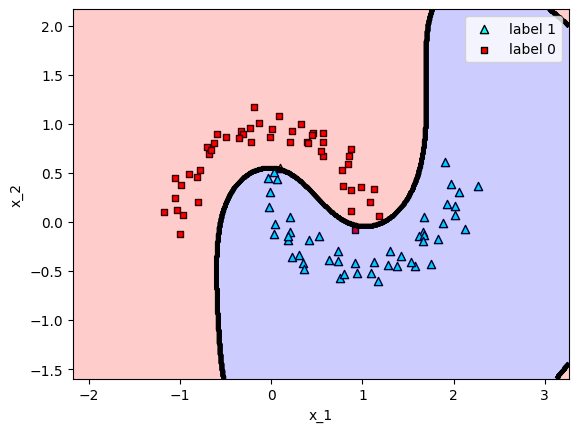

Accuracy: 0.98


In [23]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 3

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

Maybe a little too general let's make sure we care a bit more about how much slack is minimized by increasing C.

C: 1000.0 , Gamma: 1.0


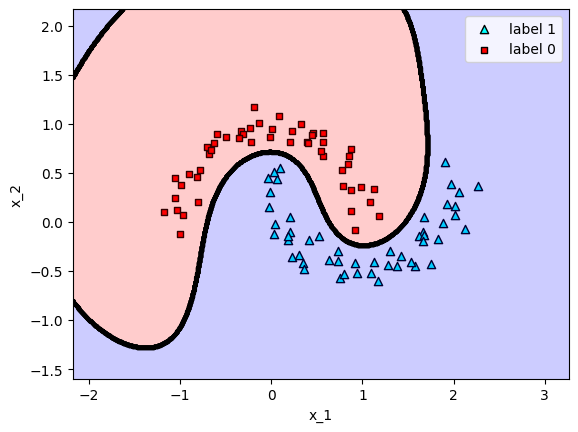

Accuracy: 1.0


In [24]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 6
gamma_val_index = 3

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

Maybe we should try just letting the kernel do it's thing?

C: 1.0 , Gamma: 1000.0


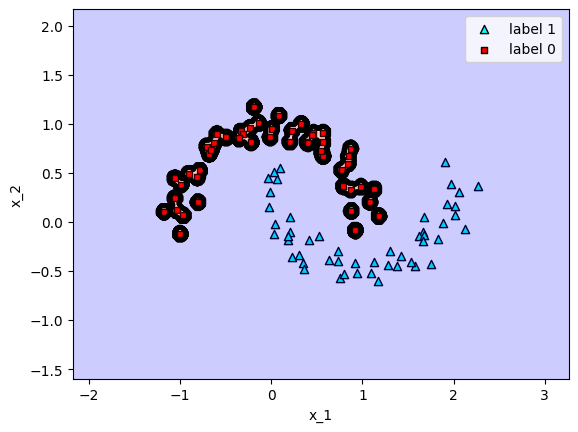

Accuracy: 1.0


In [25]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 3
gamma_val_index = 6

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

As you can see changing C and gamma can produce very different results.

C: 10.0 , Gamma: 1.0


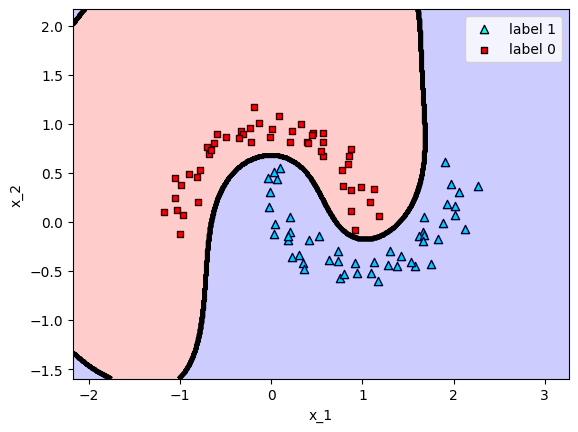

Accuracy: 1.0


In [26]:
# Create a SVM Classifier with arbitrary C and gamma
C_val_index = 4
gamma_val_index = 3

svm = SVC(C = C_values[C_val_index], gamma = gamma_values[gamma_val_index], kernel='rbf')

# Fit it to the data
svm.fit(X,y)

# Print C and Gamma Values and plot the resulting hyperplane
print(f'C: {C_values[C_val_index]} , Gamma: {gamma_values[gamma_val_index]}')
plot_model(X,y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(X,y)}')

**ONLY AFTER** you have found what you think is a "good" model generate some slightly noisier new data points using make_moons and see how your model performs on that. 

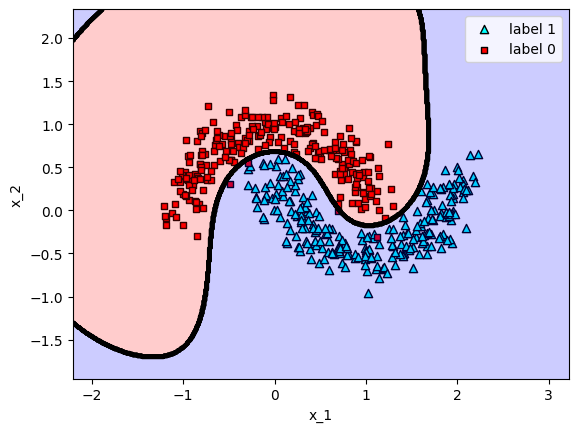

Accuracy: 0.992


In [27]:
# Generate a new dataset with 500 samples with a noise level of 0.15 and a random state of 0
test_X, test_y = make_moons(n_samples=500, noise=0.15, random_state=0)

# Plot the new data against your model
plot_model(test_X,test_y,svm)

# Print the accuracy
print(f'Accuracy: {svm.score(test_X,test_y)}')